# 딥러닝(LSTM)을 사용하여 오늘의 명언 만들기

* * *
## 1. RNN과 LSTM
### 1) RNN
인공지능을 학습시키기 위한 신경망(Neural Network)에는 CNN, RNN, RBM과 DBN 등 여러가지 종류가 있습니다.

그 중에서도 __RNN__은 Recurrent Neural Network 즉, 순환신경망의 약자로 순차적인 데이터를 다루는데 적합합니다.

인간은 생각을 할 때 아무것도 모르는채 시작하지 않습니다. 즉, 배경지식을 가지고 생각합니다.
전통적인 신경망은 인간과 같이 __'배경지식을 활용한 생각'을 하지 못한다는 것이 단점이였습니다.__
이 문제를 해결하는 신경망이 바로 __RNN__입니다. 

RNN은 은닉층의 결과가 다시 같은 은닉층의 입력으로 들어가도록 되어있기 때문에 순서 또는 시간이라는 측면을 고려할 수 있으며, sequence data(시계열 데이터)를 처리하는데 효과적입니다. 

하지만 이런 RNN도 __장기 의존성(Long-Term Dependency)__이라는 문제점이 있습니다. 제공된 데이터와 참고해야할 정보의 입력 위치 차이(Gap) 커지면 RNN은 두 정보의 문맥을 연결하지 못하게 됩니다.

이를 개선하기 위해, __LSTM(Long Short Term Memory)__가 개발되었습니다. RNN문제는 LSTM으로 어느정도 해결되어 자동 작곡, 작사, 저술, 주가 예측 등 다양한 분야에 활용되고 있습니다.


### 2) LSTM
LSTM은 Long Short-Term Memory의 약자로, __장단기 메모리__라고 합니다. 
Hochreiter & Schmidhuber(1997)에 의해 소개되었습니다. 

LSTM은 은닉층의 메모리 셀에 __입력 게이트, 삭제 게이트, 출력 게이트__를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다. LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 __셀 상태(cell state)__라는 값을 추가하였습니다.


### 3) RNN과 LSTM의 구조비교
모든 RNN은 신경망 모듈을 반복시키는 체인과 같은 형태로 되어져 있습니다. 

__기본적인 RNN 구조__는 아래와 같이 단순합니다.

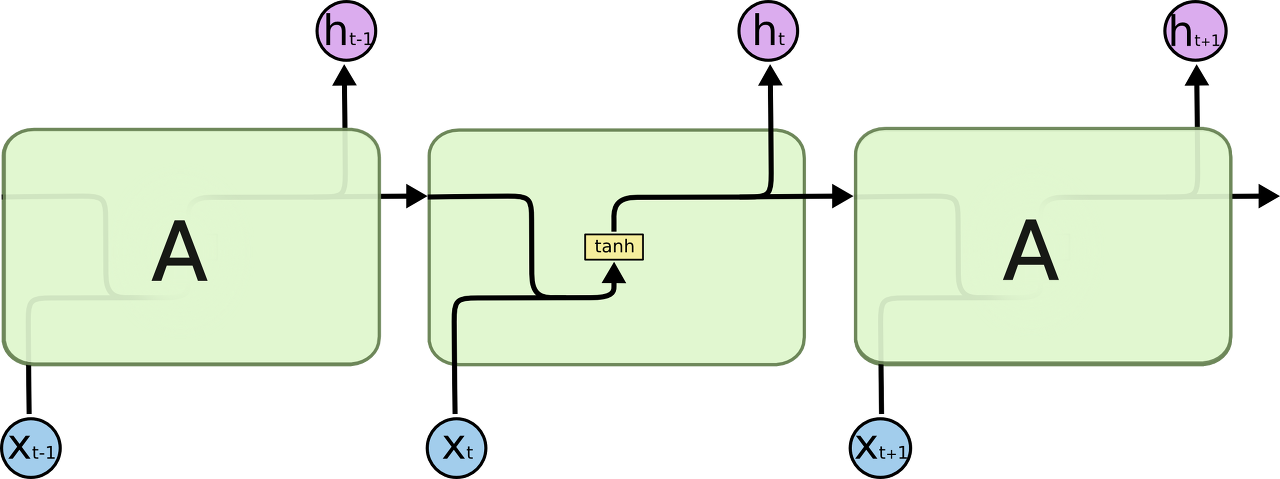!

__LSTM__도 기본적인 RNN 구조와 같이 체인과 같은 형태를 가지고 있지만, __각 반복 모듈은 다른 구조__를 갖고 있습니다.
단순한 neural network layer 한 층 대신에 __4개의 layer가 특별한 방식으로 서로 정보를 주고 받도록__ 되어 있습니다.

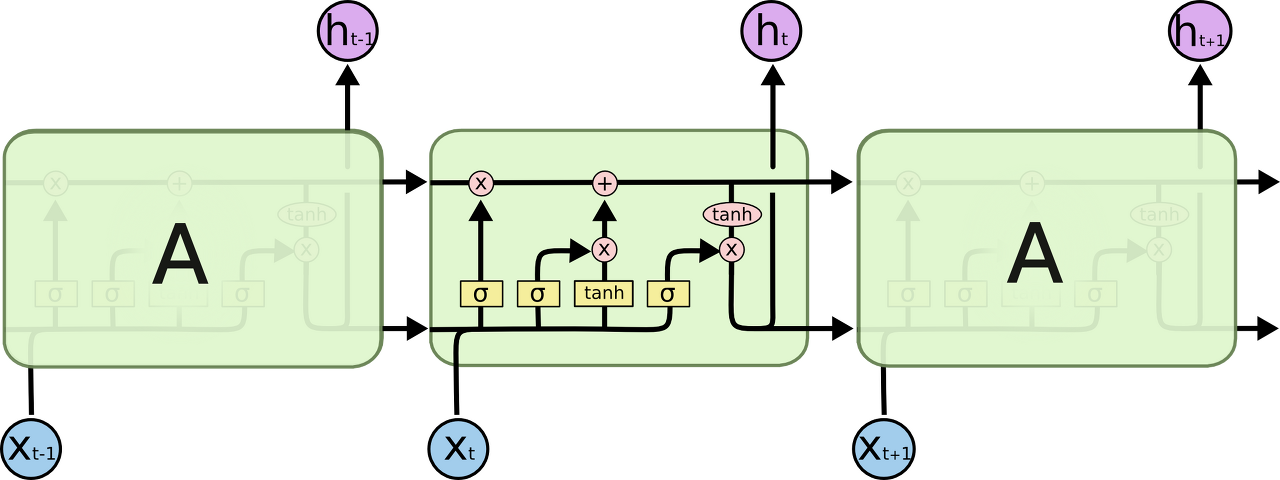


저희 조는 이와 같은 LSTM 신경망을 이용해 명언들을 학습시키고, 오늘의 명언을 만들어내는 프로젝트를 진행하게 되었습니다.
* * *

## 2. 개발 환경
### 1) 파이썬, 아나콘다, 주피터 노트북
위의 세가지는 기본적으로 설치 되어있어야 합니다. 

### 2) 주피터 노트북에 keras설치

a. 먼저 Anaconda prompt(Anaconda 3)를 관리자 권한으로 실행합니다.

b. 파이썬 패키지 소프트웨어를 설치, 관리하는 프로그램인 __pip__을 업그레이드 시켜줍니다
    <pre><code>python -m pip install –upgrade pip</code></pre>

c. keras라는 이름의 가상환경을 만듭니다. 가상환경이란 독립된 환경으로, 가상환경에서 설치된 라이브러리는 다른 환경에 영향을 주지 않습니다. 가상환경의 이름은 자신이 원하는 것으로 해주어도 괜찮습니다.  
    <pre><code>conda create -n keras python=3.7</code></pre>

d. 가상환경을 활성화시켜줍니다. 
    <pre><code>conda activate keras</code></pre>

e. 가상환경용 주피터 노트북을 설치합니다. 
    <pre><code>conda install nb_conda</code></pre>
    
f. keras를 설치합니다.
    <pre><code> pip install keras </code></pre>

### 3) 가상환경에서 주피터 노트북 실행 
a. 작업의 편리함을 위해 원하는 위치에 작업용 폴더를 하나 만듭니다.  

b. git hub에서 saying.txt를 다운 받아 작업용 폴더에 넣어줍니다. 

c. prompt 창에서 명령어 cd를 이용해 작업용 폴더에 들어갑니다. 

d. 주피터 노트북을 실행시킵니다. 
    <pre><code> jupyter notebook </code></pre>
    
### 4) 프로그램 실행
실행된 주피터 노트북에서 파이썬 notebook을 하나 만든 후, 아래의 코드를 복사/ 붙여 넣습니다.
* * *

## 3. 코드 설명

### 1) 모듈 가져오기
딥러닝 프레임워크인 __keras__와 행렬 연산 패키지인 __numpy__ 모듈을 가져옵니다. 

In [13]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np

import random
import sys
import io
import re

### 2) 데이터 가공


In [14]:
#file을 읽어옵니다
path = 'saying.txt'
with io.open(path, encoding='ansi') as f:
    text = f.read().lower()

#정규표현식을 활용하여 쓸데없는 데이터를 가공합니다
text = re.sub(r'<.*>', '', text) #<괄호>안에 있는 것들을 space로
text = re.sub(r'\n', ' ', text) #줄바꿈을 space로
text = re.sub(r' +', ' ', text) #여러개의 space( )를 하나의 space로

#text의 길이를 출력합니다 
print('corpus length:', len(text))

corpus length: 35568


### 3) Dictinoary 만들기

In [15]:
#한글자씩 때어 sort 시키고 chars에 저장 후 그길이를 출력합니다
chars = sorted(list(set(text)))
print('total chars:', len(chars))

# dict함수를 이용해 Key와 Value의 쌍을 튜플로 묶어 
# dictonery를 만들어 준다
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 38


### 4) 전처리
우리는 10글자를 주었을 때 그 다음에 올 1글자를 예측하는 방식으로 인공지능을 학습시킬 것입니다. 

따라서 먼저 for문을 돌면서 sentences에는 10글자씩, next_chars에는 1글자씩 넣어줍니다.

In [16]:
maxlen = 10
step = 3
sentences = []
next_chars = []

#sentences에는 10글자씩, next_chars에는 1글자씩 삽입 후 
#sentences의 갯수가 몇개인지 출력
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen]) #input 
    next_chars.append(text[i + maxlen]) #output
print('nb sequences:', len(sentences))


nb sequences: 11853


### 5) one hot incoding으로 char을 벡터화하기
만약 chars에 하,나,님,을,따,르,는,사,람,들 이 저장되어있다면,
이를 각각의 0과 1로 이루어진 고유한 배열로 만들어줍니다. 

예를 들면, 아래와 같이 unique하게 번호를 부여합니다.


하 0(index)  = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

나 1  = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 

님 2  = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 

을 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 

(이하 생략)

In [17]:
#one hot incoding으로 벡터화
print('Vectorization...') 

#x=input, y=output
#0으로 채워진 numpy 배열을 만든다
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

#sentences를 돌면서 해당하는 글자의 index에만 1을 넣어준다
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1 #input
    y[i, char_indices[next_chars[i]]] = 1 #output
    

Vectorization...


### 6) 모델 생성 
모델은 add하는 순서대로 만들어지게 됩니다. LSTM layer와 Dense layer를 만듭니다. 

__Dense layer__란, 입출력을 모두 연결해주는 layer로, 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 

모델을 만든 후 compile()를 호출하여 모델이 효과적으로 구현될 수 있게 학습 과정에 필요한 loss(오차 함수)와 optimizer등의 환경을 설정합니다.

In [18]:
print('Build model...')
model = Sequential() 

#LSTM layer와 Dense layer를 만듭니다
model.add(LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

#loss(오차 함수)와 optimizer등의 환경을 설정하며 compile 합니다
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001))

Build model...


### 7) call-back 직접 구현 

__call-back 함수__란, 내가 호출할 함수가 아니라 다른 것에 의해 호출 당할 함수를 말합니다.

이 프로그램에서는 on_epoch_end()함수가 sample()이라는 함수를 호출하기 때문에 sample()을 call-back 함수라고 합니다. 

keras에서 기본적으로 지원하는 call-back 함수가 있지만, 우리가 진행하는 프로젝트에서 이를 사용하면 data에 따라 반복되는 단어와 문장에 의해 loop에 빠질 수 있습니다. 

이를 방지하기 위해 우리가 직접 random을(돌발성) 부여하여 call-back 함수를 정의하여 사용해줍니다. 

In [19]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### 8)  on_epoch_end 함수 구현
한 epoch가 끝날때마다 명언을 생성하는 함수를 만들어줍니다. 

In [20]:
#한 epoch이 끝날때 마다 실행됩니다
def on_epoch_end(epoch, _):
    print('\n----- Generating text after Epoch: %d' % epoch)

    #랜덤으로 글자를 뽑을 위치를 설정
    start_index = random.randint(0, len(text) - maxlen - 1)
#     for diversity in [0.2, 0.5, 1.0, 1.2]:
#         print('----- diversity:', diversity)

    #start_index부터 글자 10개를 뽑아서 sentense에 저장
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    #sentense에 저장된 글자 10개를 one hot incoding으로 벡터화
    for i in range(10):
        #0으로 초기화된 'x_pred'라는 이름의 numpy 배열을 생성
        x_pred = np.zeros((1, maxlen, len(chars))) 
        
        #sentense안의 글자에 해당하는 index를 1로 설정해줌
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        #'x_pred'를 input으로 받아 fit함수로 학습시켰던 모델을 가지고 다음 글자 예측
        preds = model.predict(x_pred, verbose=0)[0]
        
        # 그 글자의 index가 무엇인지 받아오고 index를 이용해 char을 받아옴
        next_index = sample(preds, 0.5)
        next_char = indices_char[next_index]

        #받아온 한글자씩 generated라는 list에 넣음
        generated += next_char
        
        #한글자를 처리 했으므로 sentense를 한칸씩 움직여 그 다음 글자부터 시작해서 이번에 생성한 char까지로 변경
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char) #출력
        sys.stdout.flush() #입력버퍼 비우기
    print()

#on_epoch_end에서 사용될 call-back을 등록, print_callback이라는 변수에 저장
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

### 9) 학습

In [21]:
#학습시작: x와 y를 넣고 batch_size와 몇번 반복할지(epoch)를 설정
#default: batch_size=128, epoch=20
model.fit(x, y, batch_size=1024, epochs=60, callbacks=[print_callback])

Epoch 1/60
11853/11853 [==============================] - 39s 3ms/step - loss: 3.5941

----- Generating text after Epoch: 0
----- Generating with seed: "e. a quiet"
e. a quiete ee  soea
Epoch 2/60
11853/11853 [==============================] - 39s 3ms/step - loss: 2.9174

----- Generating text after Epoch: 1
----- Generating with seed: " work. the"
 work. theeeeestteoe
Epoch 3/60
11853/11853 [==============================] - 43s 4ms/step - loss: 2.9019

----- Generating text after Epoch: 2
----- Generating with seed: "ce. a man "
ce. a man  on   e e 
Epoch 4/60
11853/11853 [==============================] - 41s 3ms/step - loss: 2.8890

----- Generating text after Epoch: 3
----- Generating with seed: " hard word"
 hard word t   m   h
Epoch 5/60
11853/11853 [==============================] - 47s 4ms/step - loss: 2.8286

----- Generating text after Epoch: 5
----- Generating with seed: "althy, wea"
althy, weac  tu  b t
Epoch 7/60
11853/11853 [==============================] - 52s 4ms/step

KeyboardInterrupt: 

실행결과는 다음과 같다.

<처음>
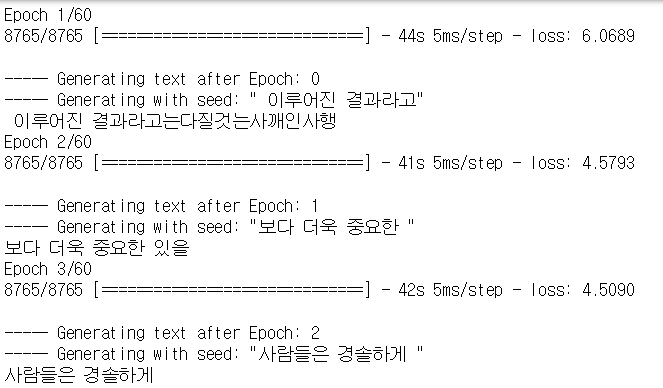

<마지막>
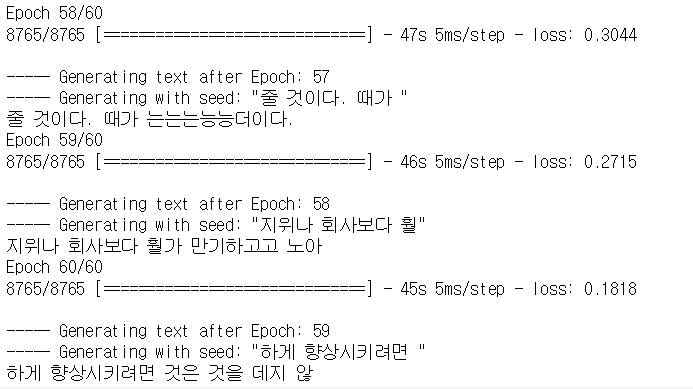